Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 70024.9375 - mean_absolute_error: 230.7227 - val_loss: 134376.9688 - val_mean_absolute_error: 349.5519
Epoch 2/1000
1/1 [==============================] - 0s 38ms/step - loss: 70012.8125 - mean_absolute_error: 230.6937 - val_loss: 134352.1094 - val_mean_absolute_error: 349.5177
Epoch 3/1000
1/1 [==============================] - 0s 36ms/step - loss: 70000.9453 - mean_absolute_error: 230.6654 - val_loss: 134329.2188 - val_mean_absolute_error: 349.4861
Epoch 4/1000
1/1 [==============================] - 0s 59ms/step - loss: 69989.4453 - mean_absolute_error: 230.6381 - val_loss: 134306.9062 - val_mean_absolute_error: 349.4555
Epoch 5/1000
1/1 [==============================] - 0s 39ms/step - loss: 69978.1328 - mean_absolute_error: 230.6114 - val_loss: 134284.4688 - val_mean_absolute_error: 349.4247
Epoch 6/1000
1/1 [==============================] - 0s 37ms/step - loss: 69966.8672 - mean_absolute_error: 230.5850 - val_

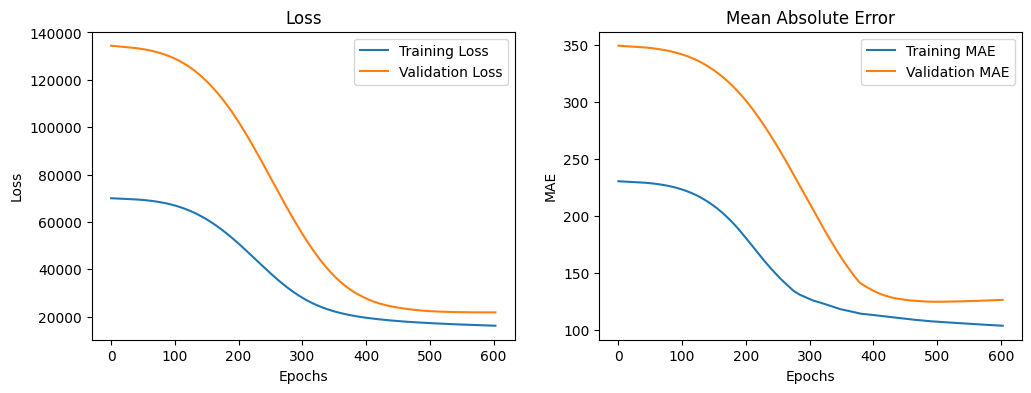

1/1 [==============================] - 0s 64ms/step


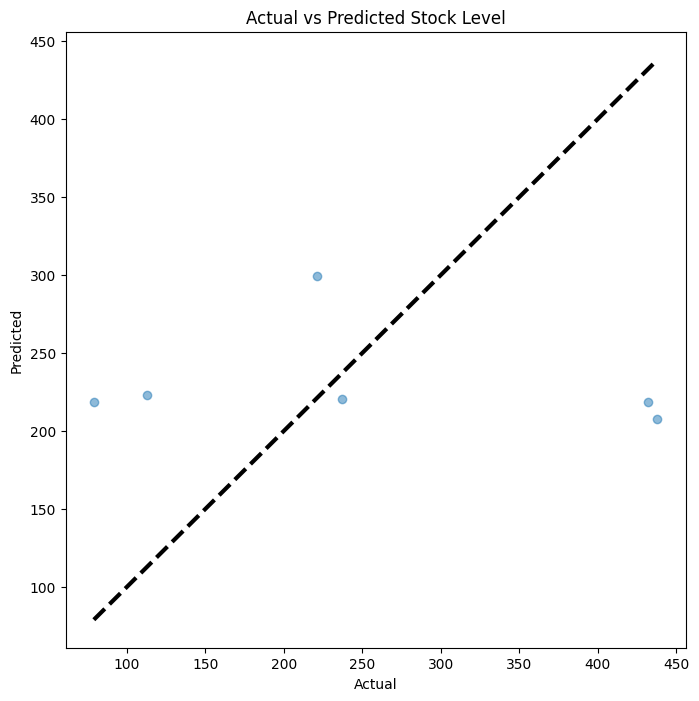

Mean Absolute Percentage Error (MAPE) on Test Set: 69.78%
Mean Squared Error (MSE) on Test Set: 22742.91


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime, timedelta

# Membuat data fiktif untuk stok obat
data = {
    'nama_obat': ['Paracetamol', 'Amoxicillin', 'Ibuprofen', 'Cetirizine', 'Omeprazole',
                  'Metformin', 'Lisinopril', 'Atorvastatin', 'Amlodipine', 'Simvastatin',
                  'Azithromycin', 'Hydrochlorothiazide', 'Furosemide', 'Gabapentin', 'Levothyroxine',
                  'Metoprolol', 'Alprazolam', 'Clonazepam', 'Citalopram', 'Escitalopram',
                  'Prednisone', 'Sertraline', 'Fluoxetine', 'Meloxicam', 'Oxycodone',
                  'Tramadol', 'Cyclobenzaprine', 'Bupropion', 'Warfarin', 'Aspirin'],
    'jenis_obat': ['Analgesik', 'Antibiotik', 'Anti-inflamasi', 'Antihistamin', 'Antasida',
                   'Antidiabetik', 'Antihipertensi', 'Hipolipidemik', 'Antihipertensi', 'Hipolipidemik',
                   'Antibiotik', 'Diuretik', 'Diuretik', 'Antikonvulsan', 'Hormon',
                   'Antihipertensi', 'Anxiolitik', 'Antikonvulsan', 'Antidepresan', 'Antidepresan',
                   'Kortikosteroid', 'Antidepresan', 'Antidepresan', 'Anti-inflamasi', 'Analgesik',
                   'Analgesik', 'Relaksan otot', 'Antidepresan', 'Antikoagulan', 'Analgesik'],
    'dosis_obat': np.random.randint(5, 1001, 30),  # dalam mg
    'satuan_obat': ['mg']*30,
    'kemasan_obat': ['Strip', 'Botol']*15,
    'kadaluarsa': [datetime.now() + timedelta(days=365*np.random.randint(1, 6)) for _ in range(30)],
    'stok_obat': np.random.randint(50, 501, 30),
    'obat_terjual': np.random.randint(5, 200, 30),
    'sisa_obat': np.random.randint(5, 400, 30),
    'order_obat': np.random.randint(10, 300, 30)
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Misalnya kita hanya menggunakan 'dosis_obat' dan 'obat_terjual' sebagai fitur untuk prediksi 'stok_obat'
X = df[['dosis_obat', 'obat_terjual']]  # Fitur
y = df['stok_obat']  # Target

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membangun Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Karena kita melakukan regresi

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Melatih Model
early_stop = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=1000, batch_size=32, callbacks=[early_stop])

# Evaluasi Model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Mean Absolute Error on Test Set: {test_mae:.2f}')

# Fungsi untuk plot hasil pelatihan
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_absolute_error'], label='Training MAE')
    plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
    plt.title('Mean Absolute Error')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.show()

plot_training_history(history)

# Fungsi untuk plot prediksi vs nilai aktual
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted Stock Level')
    plt.show()

# Prediksi
y_pred = model.predict(X_test).flatten()  # Memastikan y_pred berbentuk satu dimensi

plot_predictions(y_test, y_pred)

# Fungsi untuk menghitung Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Menghitung MAPE pada data testing
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE) on Test Set: {mape:.2f}%')

# Menghitung Mean Squared Error (MSE)
mse = np.mean(np.square(y_test - y_pred))
print(f'Mean Squared Error (MSE) on Test Set: {mse:.2f}')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime, timedelta

# Membuat data fiktif untuk stok obat
data = {
    'nama_obat': ['Paracetamol', 'Amoxicillin', 'Ibuprofen', 'Cetirizine', 'Omeprazole',
                  'Metformin', 'Lisinopril', 'Atorvastatin', 'Amlodipine', 'Simvastatin',
                  'Azithromycin', 'Hydrochlorothiazide', 'Furosemide', 'Gabapentin', 'Levothyroxine',
                  'Metoprolol', 'Alprazolam', 'Clonazepam', 'Citalopram', 'Escitalopram',
                  'Prednisone', 'Sertraline', 'Fluoxetine', 'Meloxicam', 'Oxycodone',
                  'Tramadol', 'Cyclobenzaprine', 'Bupropion', 'Warfarin', 'Aspirin'],
    'jenis_obat': ['Analgesik', 'Antibiotik', 'Anti-inflamasi', 'Antihistamin', 'Antasida',
                   'Antidiabetik', 'Antihipertensi', 'Hipolipidemik', 'Antihipertensi', 'Hipolipidemik',
                   'Antibiotik', 'Diuretik', 'Diuretik', 'Antikonvulsan', 'Hormon',
                   'Antihipertensi', 'Anxiolitik', 'Antikonvulsan', 'Antidepresan', 'Antidepresan',
                   'Kortikosteroid', 'Antidepresan', 'Antidepresan', 'Anti-inflamasi', 'Analgesik',
                   'Analgesik', 'Relaksan otot', 'Antidepresan', 'Antikoagulan', 'Analgesik'],
    'dosis_obat': np.random.randint(5, 1001, 30),  # dalam mg
    'satuan_obat': ['mg']*30,
    'kemasan_obat': ['Strip', 'Botol']*15,
    'kadaluarsa': [datetime.now() + timedelta(days=365*np.random.randint(1, 6)) for _ in range(30)],
    'stok_obat': np.random.randint(50, 501, 30),
    'obat_terjual': np.random.randint(5, 200, 30),
    'sisa_obat': np.random.randint(5, 400, 30),
    'order_obat': np.random.randint(10, 300, 30)
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Misalnya kita hanya menggunakan 'dosis_obat' dan 'obat_terjual' sebagai fitur untuk prediksi 'stok_obat'
X = df[['dosis_obat', 'obat_terjual']]  # Fitur
y = df['stok_obat']  # Target

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membangun Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Karena kita melakukan regresi

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Melatih Model
early_stop = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=1000, batch_size=32, callbacks=[early_stop])

# Evaluasi Model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Mean Absolute Error on Test Set: {test_mae:.2f}')

# Fungsi untuk plot hasil pelatihan
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_absolute_error'], label='Training MAE')
    plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
    plt.title('Mean Absolute Error')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.show()

plot_training_history(history)

# Fungsi untuk plot prediksi vs nilai aktual
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted Stock Level')
    plt.show()

# Prediksi
y_pred = model.predict(X_test).flatten()  # Memastikan y_pred berbentuk satu dimensi

plot_predictions(y_test, y_pred)

# Fungsi untuk menghitung Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Menghitung MAPE pada data testing
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE) on Test Set: {mape:.2f}%')

# Menghitung Mean Squared Error (MSE)
mse = np.mean(np.square(y_test - y_pred))
print(f'Mean Squared Error (MSE) on Test Set: {mse:.2f}')



In [ ]:
                    validation_split=0.2,
                    epochs=25,
                    batch_size=32,
                    callbacks=[early_stop])


Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 9171.6826 - mean_absolute_error: 79.4215 - val_loss: 24732.8008 - val_mean_absolute_error: 132.4871
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 9171.5986 - mean_absolute_error: 79.3562 - val_loss: 24681.6582 - val_mean_absolute_error: 132.3193
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 9171.5293 - mean_absolute_error: 79.2971 - val_loss: 24635.9688 - val_mean_absolute_error: 132.1700
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 9171.4658 - mean_absolute_error: 79.2530 - val_loss: 24595.2773 - val_mean_absolute_error: 132.0377
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 9171.3682 - mean_absolute_error: 79.2286 - val_loss: 24559.1680 - val_mean_absolute_error: 131.9213
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 9171.3145 - mean_absolute_error: 79.2067 - val_loss: 24527.5371 - val_mean_absolute_error: 131.8199
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss:

Epoch 1/1000
3/3 [==============================] - 3s 364ms/step - loss: 85413.2734 - mean_absolute_error: 258.7851 - val_loss: 88041.1328 - val_mean_absolute_error: 258.5434
Epoch 2/1000
3/3 [==============================] - 0s 68ms/step - loss: 85356.1094 - mean_absolute_error: 258.6762 - val_loss: 87991.2109 - val_mean_absolute_error: 258.4482
Epoch 3/1000
3/3 [==============================] - 0s 44ms/step - loss: 85301.4062 - mean_absolute_error: 258.5702 - val_loss: 87940.0859 - val_mean_absolute_error: 258.3497
Epoch 4/1000
3/3 [==============================] - 0s 42ms/step - loss: 85242.3281 - mean_absolute_error: 258.4559 - val_loss: 87886.5469 - val_mean_absolute_error: 258.2460
Epoch 5/1000
3/3 [==============================] - 0s 53ms/step - loss: 85181.3672 - mean_absolute_error: 258.3387 - val_loss: 87831.1094 - val_mean_absolute_error: 258.1382
Epoch 6/1000
3/3 [==============================] - 0s 62ms/step - loss: 85116.3984 - mean_absolute_error: 258.2156 - val_lo

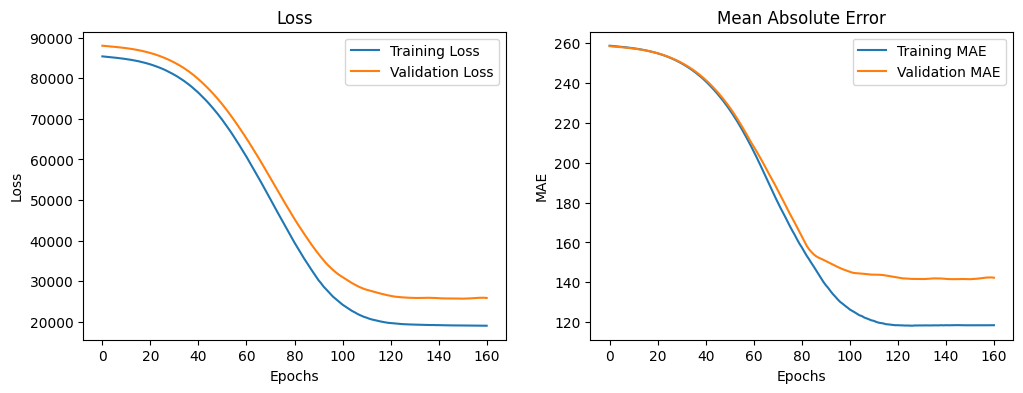

1/1 [==============================] - 0s 186ms/step


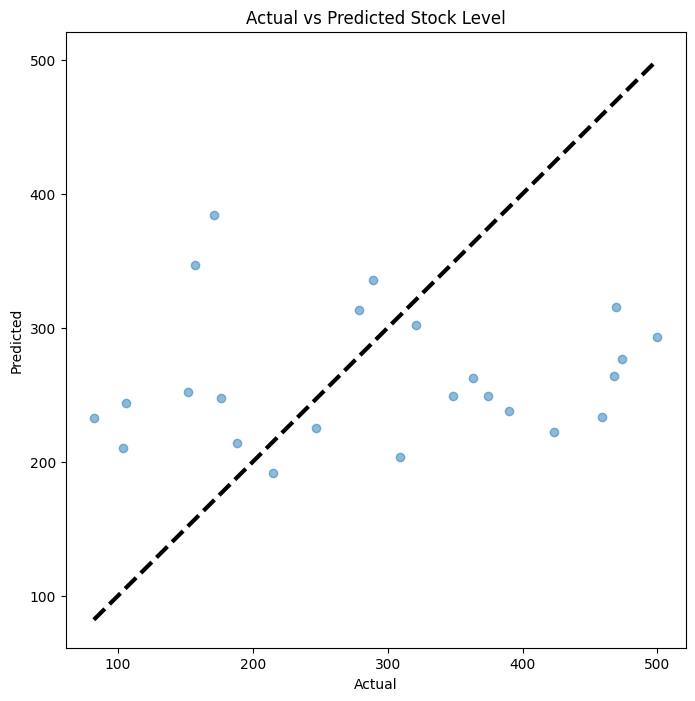

Mean Absolute Percentage Error (MAPE) on Test Set: 52.29%
Mean Squared Error (MSE) on Test Set: 19302.56


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime, timedelta

# Fungsi untuk membuat data fiktif
def generate_data(n_samples=120):
    data = {
        'nama_obat': np.random.choice(['Paracetamol', 'Amoxicillin', 'Ibuprofen', 'Cetirizine', 'Omeprazole',
                                      'Metformin', 'Lisinopril', 'Atorvastatin', 'Amlodipine', 'Simvastatin',
                                      'Azithromycin', 'Hydrochlorothiazide', 'Furosemide', 'Gabapentin', 'Levothyroxine',
                                      'Metoprolol', 'Alprazolam', 'Clonazepam', 'Citalopram', 'Escitalopram',
                                      'Prednisone', 'Sertraline', 'Fluoxetine', 'Meloxicam', 'Oxycodone',
                                      'Tramadol', 'Cyclobenzaprine', 'Bupropion', 'Warfarin', 'Aspirin'], n_samples),
        'jenis_obat': np.random.choice(['Analgesik', 'Antibiotik', 'Anti-inflamasi', 'Antihistamin', 'Antasida',
                                        'Antidiabetik', 'Antihipertensi', 'Hipolipidemik', 'Diuretik', 'Antikonvulsan',
                                        'Hormon', 'Anxiolitik', 'Kortikosteroid', 'Relaksan otot', 'Antidepresan', 'Antikoagulan'], n_samples),
        'dosis_obat': np.random.randint(5, 1001, n_samples),  # dalam mg
        'satuan_obat': ['mg']*n_samples,
        'kemasan_obat': np.random.choice(['Strip', 'Botol'], n_samples),
        'kadaluarsa': [datetime.now() + timedelta(days=365*np.random.randint(1, 6)) for _ in range(n_samples)],
        'stok_obat': np.random.randint(50, 501, n_samples),
        'obat_terjual': np.random.randint(5, 200, n_samples),
        'sisa_obat': np.random.randint(5, 400, n_samples),
        'order_obat': np.random.randint(10, 300, n_samples)
    }
    return pd.DataFrame(data)

# Membuat DataFrame
df = generate_data()

# Menggunakan 'dosis_obat' dan 'obat_terjual' sebagai fitur untuk prediksi 'stok_obat'
X = df[['dosis_obat', 'obat_terjual']]  # Fitur
y = df['stok_obat']  # Target

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membangun Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Karena kita melakukan regresi

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Melatih Model
early_stop = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=1000, batch_size=32, callbacks=[early_stop])

# Evaluasi Model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Mean Absolute Error on Test Set: {test_mae:.2f}')

# Fungsi untuk plot hasil pelatihan
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_absolute_error'], label='Training MAE')
    plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
    plt.title('Mean Absolute Error')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.show()

plot_training_history(history)

# Fungsi untuk plot prediksi vs nilai aktual
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted Stock Level')
    plt.show()

# Prediksi
y_pred = model.predict(X_test).flatten()  # Memastikan y_pred berbentuk satu dimensi

plot_predictions(y_test, y_pred)

# Fungsi untuk menghitung Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Menghitung MAPE pada data testing
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE) on Test Set: {mape:.2f}%')

# Menghitung Mean Squared Error (MSE)
mse = np.mean(np.square(y_test - y_pred))
print(f'Mean Squared Error (MSE) on Test Set: {mse:.2f}')


Epoch 1/1000
6/6 [==============================] - 3s 119ms/step - loss: 104497.9609 - mean_absolute_error: 294.0754 - val_loss: 90518.1797 - val_mean_absolute_error: 274.7965
Epoch 2/1000
6/6 [==============================] - 0s 39ms/step - loss: 104379.9062 - mean_absolute_error: 293.8768 - val_loss: 90407.3750 - val_mean_absolute_error: 274.5998
Epoch 3/1000
6/6 [==============================] - 0s 35ms/step - loss: 104270.3516 - mean_absolute_error: 293.6860 - val_loss: 90296.8125 - val_mean_absolute_error: 274.4018
Epoch 4/1000
6/6 [==============================] - 0s 34ms/step - loss: 104156.4922 - mean_absolute_error: 293.4872 - val_loss: 90176.6484 - val_mean_absolute_error: 274.1861
Epoch 5/1000
6/6 [==============================] - 0s 26ms/step - loss: 104031.2500 - mean_absolute_error: 293.2708 - val_loss: 90039.3359 - val_mean_absolute_error: 273.9402
Epoch 6/1000
6/6 [==============================] - 0s 13ms/step - loss: 103882.7578 - mean_absolute_error: 293.0219 - 

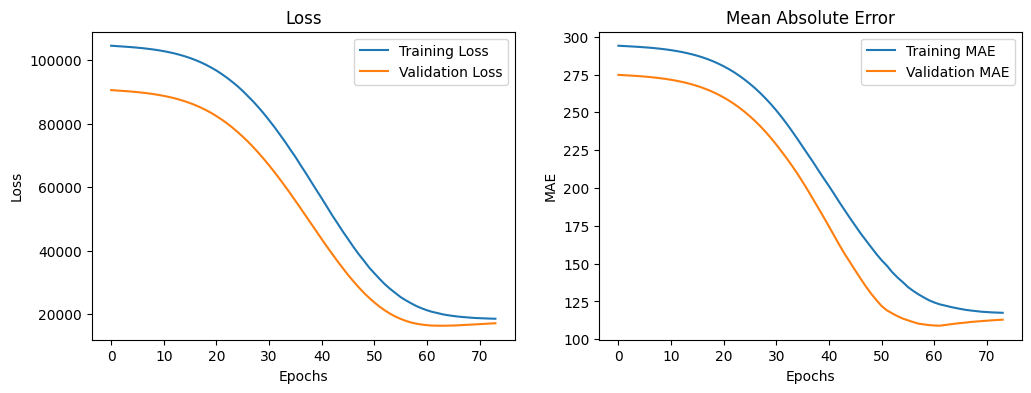

2/2 [==============================] - 0s 5ms/step


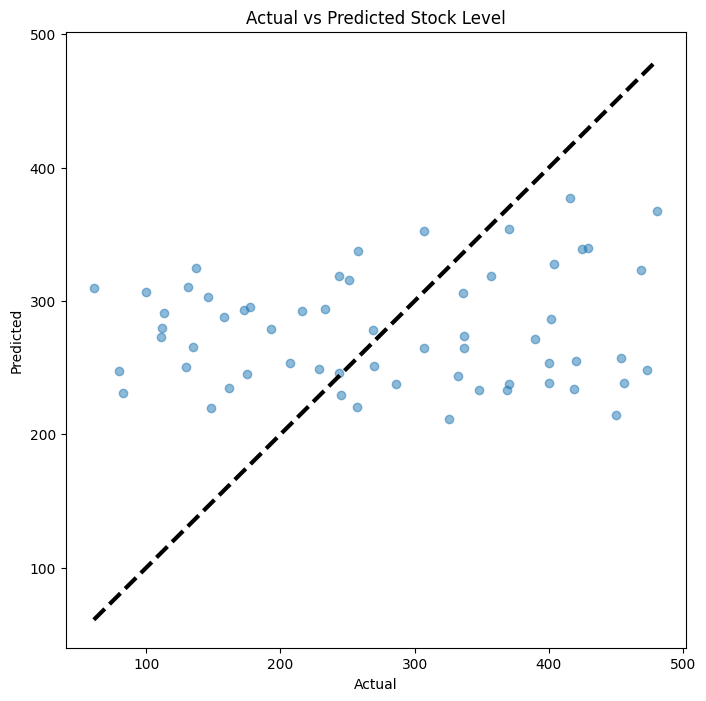

Mean Absolute Percentage Error (MAPE) on Test Set: 57.45%
Mean Squared Error (MSE) on Test Set: 15599.56


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime, timedelta

# Fungsi untuk membuat data fiktif
def generate_data(n_samples=300):
    data = {
        'nama_obat': np.random.choice(['Paracetamol', 'Amoxicillin', 'Ibuprofen', 'Cetirizine', 'Omeprazole',
                                      'Metformin', 'Lisinopril', 'Atorvastatin', 'Amlodipine', 'Simvastatin',
                                      'Azithromycin', 'Hydrochlorothiazide', 'Furosemide', 'Gabapentin', 'Levothyroxine',
                                      'Metoprolol', 'Alprazolam', 'Clonazepam', 'Citalopram', 'Escitalopram',
                                      'Prednisone', 'Sertraline', 'Fluoxetine', 'Meloxicam', 'Oxycodone',
                                      'Tramadol', 'Cyclobenzaprine', 'Bupropion', 'Warfarin', 'Aspirin'], n_samples),
        'jenis_obat': np.random.choice(['Analgesik', 'Antibiotik', 'Anti-inflamasi', 'Antihistamin', 'Antasida',
                                        'Antidiabetik', 'Antihipertensi', 'Hipolipidemik', 'Diuretik', 'Antikonvulsan',
                                        'Hormon', 'Anxiolitik', 'Kortikosteroid', 'Relaksan otot', 'Antidepresan', 'Antikoagulan'], n_samples),
        'dosis_obat': np.random.randint(5, 1001, n_samples),  # dalam mg
        'satuan_obat': ['mg']*n_samples,
        'kemasan_obat': np.random.choice(['Strip', 'Botol'], n_samples),
        'kadaluarsa': [datetime.now() + timedelta(days=365*np.random.randint(1, 6)) for _ in range(n_samples)],
        'stok_obat': np.random.randint(50, 501, n_samples),
        'obat_terjual': np.random.randint(5, 200, n_samples),
        'sisa_obat': np.random.randint(5, 400, n_samples),
        'order_obat': np.random.randint(10, 300, n_samples)
    }
    return pd.DataFrame(data)

# Membuat DataFrame
df = generate_data()

# Menggunakan 'dosis_obat' dan 'obat_terjual' sebagai fitur untuk prediksi 'stok_obat'
X = df[['dosis_obat', 'obat_terjual']]  # Fitur
y = df['stok_obat']  # Target

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membangun Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Karena kita melakukan regresi

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Melatih Model
early_stop = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=1000, batch_size=32, callbacks=[early_stop])

# Evaluasi Model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Mean Absolute Error on Test Set: {test_mae:.2f}')

# Fungsi untuk plot hasil pelatihan
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_absolute_error'], label='Training MAE')
    plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
    plt.title('Mean Absolute Error')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.show()

plot_training_history(history)

# Fungsi untuk plot prediksi vs nilai aktual
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted Stock Level')
    plt.show()

# Prediksi
y_pred = model.predict(X_test).flatten()  # Memastikan y_pred berbentuk satu dimensi

plot_predictions(y_test, y_pred)

# Fungsi untuk menghitung Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Menghitung MAPE pada data testing
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE) on Test Set: {mape:.2f}%')

# Menghitung Mean Squared Error (MSE)
mse = np.mean(np.square(y_test - y_pred))
print(f'Mean Squared Error (MSE) on Test Set: {mse:.2f}')


Epoch 1/1000
12/12 [==============================] - 3s 71ms/step - loss: 96346.3125 - mean_absolute_error: 282.5636 - val_loss: 102482.7188 - val_mean_absolute_error: 296.9987
Epoch 2/1000
12/12 [==============================] - 0s 14ms/step - loss: 96153.9375 - mean_absolute_error: 282.2222 - val_loss: 102249.2188 - val_mean_absolute_error: 296.6099
Epoch 3/1000
12/12 [==============================] - 0s 15ms/step - loss: 95891.7578 - mean_absolute_error: 281.7552 - val_loss: 101931.0391 - val_mean_absolute_error: 296.0795
Epoch 4/1000
12/12 [==============================] - 0s 22ms/step - loss: 95541.3047 - mean_absolute_error: 281.1295 - val_loss: 101501.0000 - val_mean_absolute_error: 295.3609
Epoch 5/1000
12/12 [==============================] - 0s 13ms/step - loss: 95062.9375 - mean_absolute_error: 280.2750 - val_loss: 100926.6797 - val_mean_absolute_error: 294.3973
Epoch 6/1000
12/12 [==============================] - 0s 9ms/step - loss: 94429.5703 - mean_absolute_error: 27

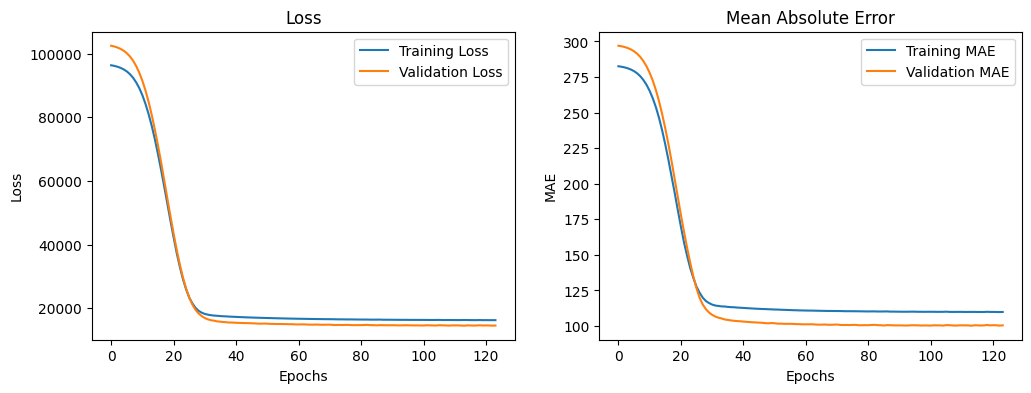

4/4 [==============================] - 0s 5ms/step


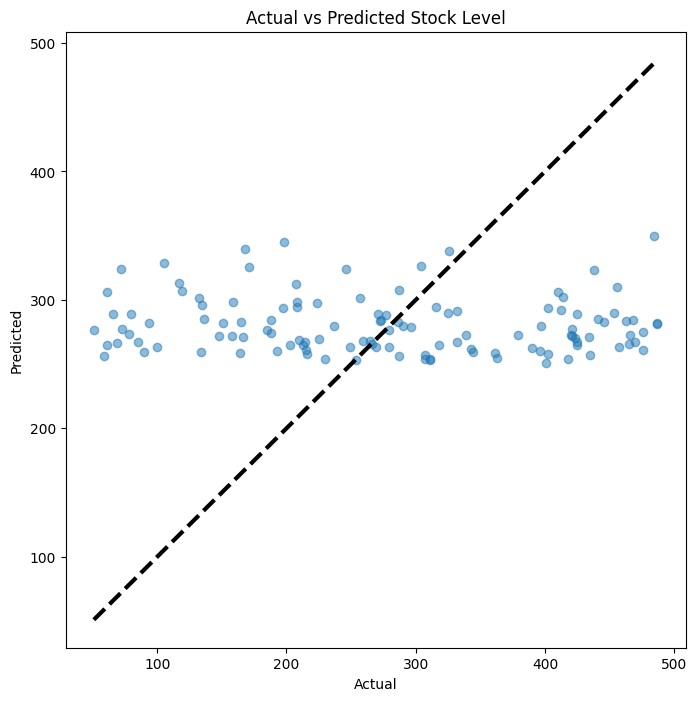

Mean Absolute Percentage Error (MAPE) on Test Set: 67.43%
Mean Squared Error (MSE) on Test Set: 17207.24


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime, timedelta

# Fungsi untuk membuat data fiktif
def generate_data(n_samples=300):
    data = {
        'nama_obat': np.random.choice(['Paracetamol', 'Amoxicillin', 'Ibuprofen', 'Cetirizine', 'Omeprazole',
                                      'Metformin', 'Lisinopril', 'Atorvastatin', 'Amlodipine', 'Simvastatin',
                                      'Azithromycin', 'Hydrochlorothiazide', 'Furosemide', 'Gabapentin', 'Levothyroxine',
                                      'Metoprolol', 'Alprazolam', 'Clonazepam', 'Citalopram', 'Escitalopram',
                                      'Prednisone', 'Sertraline', 'Fluoxetine', 'Meloxicam', 'Oxycodone',
                                      'Tramadol', 'Cyclobenzaprine', 'Bupropion', 'Warfarin', 'Aspirin'], n_samples),
        'jenis_obat': np.random.choice(['Analgesik', 'Antibiotik', 'Anti-inflamasi', 'Antihistamin', 'Antasida',
                                        'Antidiabetik', 'Antihipertensi', 'Hipolipidemik', 'Diuretik', 'Antikonvulsan',
                                        'Hormon', 'Anxiolitik', 'Kortikosteroid', 'Relaksan otot', 'Antidepresan', 'Antikoagulan'], n_samples),
        'dosis_obat': np.random.randint(5, 1001, n_samples),  # dalam mg
        'satuan_obat': ['mg']*n_samples,
        'kemasan_obat': np.random.choice(['Strip', 'Botol'], n_samples),
        'kadaluarsa': [datetime.now() + timedelta(days=365*np.random.randint(1, 6)) for _ in range(n_samples)],
        'stok_obat': np.random.randint(50, 501, n_samples),
        'obat_terjual': np.random.randint(5, 200, n_samples),
        'sisa_obat': np.random.randint(5, 400, n_samples),
        'order_obat': np.random.randint(10, 300, n_samples)
    }
    return pd.DataFrame(data)

# Membuat DataFrame awal
df = generate_data()

# Menambahkan 300 dataset tambahan
df_additional = generate_data(300)
df = pd.concat([df, df_additional], ignore_index=True)

# Menggunakan 'dosis_obat' dan 'obat_terjual' sebagai fitur untuk prediksi 'stok_obat'
X = df[['dosis_obat', 'obat_terjual']]  # Fitur
y = df['stok_obat']  # Target

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membangun Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Karena kita melakukan regresi

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Melatih Model
early_stop = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=1000, batch_size=32, callbacks=[early_stop])

# Evaluasi Model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Mean Absolute Error on Test Set: {test_mae:.2f}')

# Fungsi untuk plot hasil pelatihan
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_absolute_error'], label='Training MAE')
    plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
    plt.title('Mean Absolute Error')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.show()

plot_training_history(history)

# Fungsi untuk plot prediksi vs nilai aktual
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted Stock Level')
    plt.show()

# Prediksi
y_pred = model.predict(X_test).flatten()  # Memastikan y_pred berbentuk satu dimensi

plot_predictions(y_test, y_pred)

# Fungsi untuk menghitung Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Menghitung MAPE pada data testing
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE) on Test Set: {mape:.2f}%')

# Menghitung Mean Squared Error (MSE)
mse = np.mean(np.square(y_test - y_pred))
print(f'Mean Squared Error (MSE) on Test Set: {mse:.2f}')
